# K-Means Clustering

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs

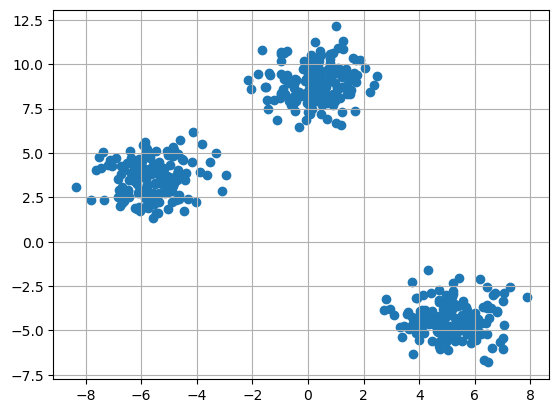

In [2]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)
fig = plt.figure(0) 
plt.grid(True) 
plt.scatter(X[:,0],X[:,1]) 
plt.show()

In [3]:
# Initialize the random centroids
k = 3 
clusters = {} 
np.random.seed(23) 
for idx in range(k): 
 center = 2*(2*np.random.random((X.shape[1],))-1) 
 points = [] 
 cluster = { 
 'center' : center, 
 'points' : [] 
 } 
 clusters[idx] = cluster 
clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

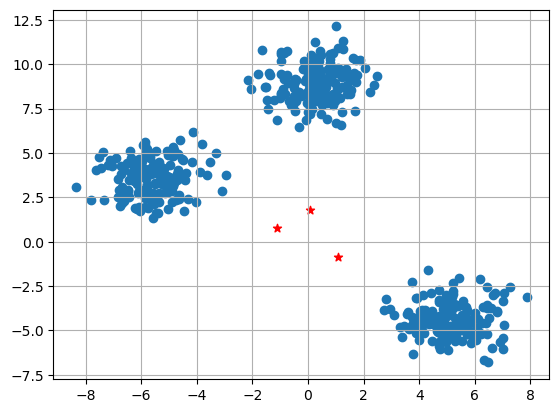

In [4]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True) 
for i in clusters: 
 center = clusters[i]['center'] 
 plt.scatter(center[0],center[1],marker = '*',c = 'red') 
plt.show()

In [5]:
def distance(p1,p2):
 return np.sqrt(np.sum((p1-p2)**2))

In [8]:
import numpy as np

# Function to calculate the Euclidean distance between two points
def distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Implementing the E-step
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []
        curr_x = X[idx]
        for i in range(len(clusters)):  # Use len(clusters) instead of k
            dis = distance(curr_x, clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

# Implementing the M-step
def update_clusters(X, clusters):
    for i in range(len(clusters)):  # Use len(clusters) instead of k
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis=0)
            clusters[i]['center'] = new_center
        clusters[i]['points'] = []  # Clear points for the next iteration
    return clusters


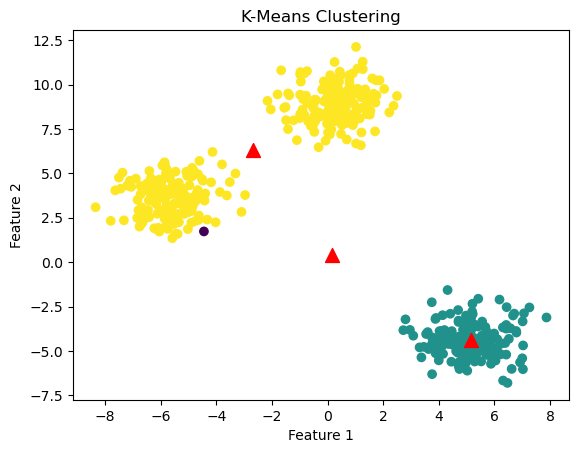

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the Euclidean distance between two points
def distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to predict the cluster for each data point
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(len(clusters)):  # Use len(clusters) instead of k
            dist.append(distance(X[i], clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

# Assuming k is the number of clusters
k = 3  # Example value, adjust according to your dataset

# Example initialization of clusters
clusters = [{'center': np.random.rand(X.shape[1]), 'points': []} for _ in range(k)]

# Running the K-means algorithm
clusters = assign_clusters(X, clusters)
clusters = update_clusters(X, clusters)

# Predicting clusters for plotting
pred = pred_cluster(X, clusters)

# Plotting the data points and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap='viridis')

# Plotting the cluster centers
for cluster in clusters:
    center = cluster['center']
    plt.scatter(center[0], center[1], marker='^', c='red', s=100)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()


Total SSE: 409.75
Cluster 0 SSE: 0.0
Cluster 1 SSE: 409.75


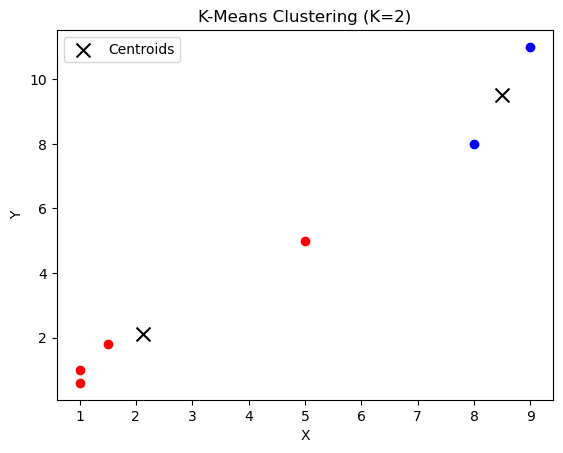

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data = np.array([[1, 1], [1.5, 1.8], [5, 5], [8, 8], [1, 0.6], [9, 11]])

# Function to calculate Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

# Function to initialize centroids
def initialize_centroids(data, K):
    centroids = []
    # Randomly select K data points as initial centroids
    for _ in range(K):
        random_index = np.random.randint(0, len(data))
        centroids.append(data[random_index])
    return np.array(centroids)

# Function to assign data points to closest centroid and calculate SSE
def assign_to_clusters_and_calculate_sse(data, centroids):
    clusters = []
    sse = np.zeros(len(centroids))  # Initialize SSE for each cluster
    for i, point in enumerate(data):
        min_distance = float('inf')
        min_index = -1
        for j, centroid in enumerate(centroids):
            distance = euclidean_distance(point, centroid)
            if distance < min_distance:
                min_distance = distance
                min_index = j
        sse[j] += distance**2  # Accumulate squared distance for each cluster
        clusters.append(min_index)
    return np.array(clusters), sse

# Function to update centroids based on assigned clusters
def update_centroids(data, clusters, K):
    new_centroids = np.zeros((K, data.shape[1]))
    for i in range(K):
        data_points_in_cluster = data[clusters == i]
        # If no points are assigned to a cluster, avoid division by zero
        if len(data_points_in_cluster) > 0:
            new_centroids[i] = np.mean(data_points_in_cluster, axis=0)
    return new_centroids

# Function to perform K-Means clustering
def kmeans(data, K):
    centroids = initialize_centroids(data, K)
    clusters = None
    # Iterate until centroids no longer change significantly
    while True:
        prev_centroids = centroids.copy()
        clusters, sse = assign_to_clusters_and_calculate_sse(data, centroids)
        centroids = update_centroids(data, clusters, K)
        # Check for convergence (stopping condition)
        if np.all(np.equal(prev_centroids, centroids)):
            break
    return clusters, centroids, sse

# Set the number of clusters (K)
K = 2

# Run K-Means clustering
clusters, centroids, sse = kmeans(data, K)

# Print the total SSE and individual SSE for each cluster
print("Total SSE:", np.sum(sse))
for i in range(K):
    print("Cluster", i, "SSE:", sse[i])

# Visualize the results
colors = ['red', 'blue']
for i, point in enumerate(data):
    plt.plot(point[0], point[1], 'o', color=colors[clusters[i]])

plt.scatter(centroids[:, 0], centroids[:, 1], s=100, marker='x', color='black', label='Centroids')
plt.title('K-Means Clustering (K=' + str(K) + ')')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
